# O Dataset e o Projeto: Passangers 
<hr>
<p> Thomas Bekhor, João Bresser, Marcos Paulo</p>

###  Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> O dataset é o conjunto de passageiros, que fizeram uma viagem interplanetar.</p>

### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Passengerid </b> - Numero individual de cada passageiro.</li>
    <li><b>Home Planet</b> - Local de origem do passageiro. </li>
    <li><b>CryoSleep</b> - Indica se o passageiro foi colocado em "CryoSleep"  </li>
    <li><b>Cabin</b> - Cabine que o passageiro estava. Deck/numero/lado </li>
    <li><b>Destination</b> - Local que o passageiro vai </li>
    <li><b>Age</b> - Idade do passageiro </li>
    <li><b>VIP</b> - Se o passageiro é VIP </li>
    <li><b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Dinheiro que cada passageiro gastou na viagem </li>
    <li><b>Name</b> - Nome do passageiro </li>
    <li><b>Transported</b> - Se o passageiro foi transportado para outra dimensão </li>
</ul>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Classificação</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. No final do projeto teremos um modelo de Classificação acurado para a target Transported.</p>
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

# <font color='red' style='font-size: 30px;'>Importando bibliotecas</font>
<hr style='border: 2px solid red;'>

In [135]:
%matplotlib inline
#bibliotecas matemáticas e graficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#separação entre treino e teste
from sklearn.model_selection import train_test_split

#separação estratificada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#resultados da modelagem
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#fazer o cross validation
from sklearn.model_selection import cross_val_score


#encontrando os melhores features
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

#serializar modelo
import joblib


#tuning de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from pprint import pprint


In [136]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

# <font color='red' style='font-size: 30px;'>Explorando o DataSet</font>
<hr style='border: 2px solid red;'>

In [137]:
df_passangers = pd.read_csv("DATA2_passengers.csv")

In [138]:
df_passangers.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [139]:
df_passangers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [140]:
df_passangers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [141]:
df_passangers.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# <font color='red' style='font-size: 30px;'>Tratando Dados Nulos</font>
<hr style='border: 2px solid red;'>

In [142]:
df_passangers=df_passangers[df_passangers["Transported"].notna()]
#a coluna Transported é exencial para a nossa analise. (não tem nulo mas vou garantir)

In [143]:
#Quantidade de Vip True e False no dataframe
#Como tem bem menos True para os valores faltantes faz sentido coloca-los como False
df_passangers['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [144]:
#ver a quantidade de nao nulos e fazer input para os que tem quantidade relevante 
import math

#Para todos os Valores de nulos que são quantitativos coloquei a mediana
#Porque todos os que fazem referencia a renda tem a mesma distribuição
# e colando a mediana a distribuição dos dados não é tao alterada

SPA_medio=df_passangers['Spa'].median()
SPA_medio=math.floor(SPA_medio)
df_passangers.update(df_passangers['Spa'].fillna(SPA_medio))



shopping_medio=df_passangers['ShoppingMall'].median()
shopping_medio=math.floor(shopping_medio)
df_passangers.update(df_passangers['ShoppingMall'].fillna(shopping_medio))

df_passangers=df_passangers[df_passangers["Cabin"].notna()]

Age_medio=df_passangers["Age"].median()
Age_medio=math.floor(Age_medio)
df_passangers.update(df_passangers["Age"].fillna(Age_medio))


df_passangers.update(df_passangers["VIP"].fillna(False))
#Justificado anteriormente o valor de VIP 

RoomService_medio=df_passangers["RoomService"].median()
RoomService_medio=math.floor(RoomService_medio)
df_passangers.update(df_passangers["RoomService"].fillna(RoomService_medio))


FoodCourt_medio=df_passangers["FoodCourt"].median()
FoodCourt_medio=math.floor(FoodCourt_medio)
df_passangers.update(df_passangers["FoodCourt"].fillna(FoodCourt_medio))


VRDeck_medio=df_passangers["VRDeck"].median()
VRDeck_medio=math.floor(VRDeck_medio)
df_passangers.update(df_passangers["VRDeck"].fillna(VRDeck_medio))




<p>Na celula de baixo vou filtrar os valores quantitavos maiores que 0 para ter uma visão melhor da distribuição deles. Uma vez que deixando o 0 dá para ver que todos tem uma distribuição de 0 muito grandes, mas não dá para ver as distribuióes seguintes</p>


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
14,0011_01,Earth,False,F/2/P,TRAPPIST-1e,28.0,False,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
54,0056_03,Europa,False,A/1/S,TRAPPIST-1e,27.0,False,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,3707_01,Earth,False,G/604/S,TRAPPIST-1e,18.0,False,622.0,53.0,8.0,47.0,39.0,Marvey Delangleton,False
3457,3716_01,Earth,False,G/603/P,TRAPPIST-1e,18.0,False,18.0,2.0,1769.0,1.0,2.0,Fredy Batestonley,True
3503,3761_01,NaN,False,E/222/P,55 Cancri e,45.0,False,824.0,2196.0,385.0,19.0,1113.0,Nuscham Stingive,True
3517,3774_03,Earth,False,F/778/P,TRAPPIST-1e,35.0,False,227.0,117.0,394.0,9.0,56.0,Dorah Willy,False


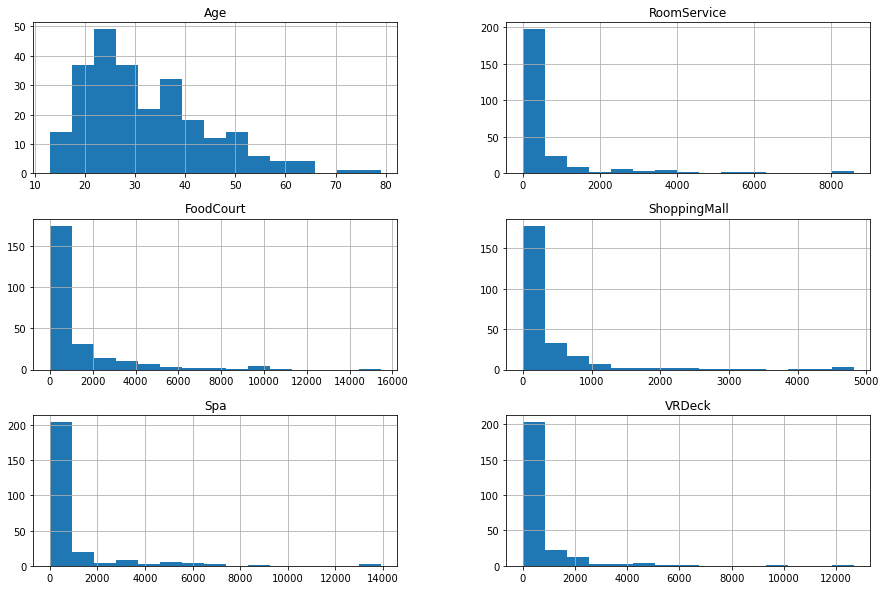

In [145]:
filtra = df_passangers['Spa']>= 0.1
filtro= df_passangers['FoodCourt']>=0.1
filtru= df_passangers['RoomService']>=0.1
filtre= df_passangers['ShoppingMall']>=0.1
filtrt= df_passangers['VRDeck']>=0.001
df_analise=df_passangers.loc[filtra & filtro & filtru & filtre & filtrt,:]

BINS= int(np.sqrt(len(df_analise.index)))
df_analise.hist(bins=BINS,figsize=(15,10));



<p>Como a distribuição dos valores de renda são muito parecidos faz sentido juntar todos eles em um único valor para conseguir fazer uma analise dos dados mais simples, ja que não precisarei ficar fazendo para cada valor </p>

In [146]:
#Criando coluna que é a soma de todos os valores
df_passangers['Valor Bruto']=df_passangers['RoomService']+df_passangers['FoodCourt']+df_passangers['ShoppingMall']+df_passangers['Spa']+df_passangers['VRDeck']
df_passangers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Valor Bruto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [147]:
#estou vendo quais variaveis ainda preciso fazer input nelas
df_passangers.isnull().sum()

PassengerId       0
HomePlanet      195
CryoSleep       210
Cabin             0
Destination     178
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            198
Transported       0
Valor Bruto       0
dtype: int64

(-2000.0, 5000.0)

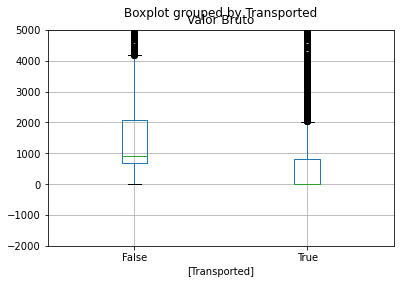

In [148]:
df_passangers.boxplot(['Valor Bruto'], by=['Transported'])
plt.ylim(-2000,5000)

<p>Pelo Grafico acima consegue-se observar que pelo menos metade das pessoas que são Transported não tiveram gasto nenhum de dinheiro durante a viagem, isso se deve, parte por que tiveram pessoas que fizeram CryoSleep e muitas dessas foram Transportadas.</p>

<p>No grafico a baixo se dá para comprovar que a grande maioria das pessoas que fizeram CryoSleep não tiveram gasto nenhum</p>

<AxesSubplot:title={'center':'Valor Bruto'}, xlabel='[CryoSleep]'>

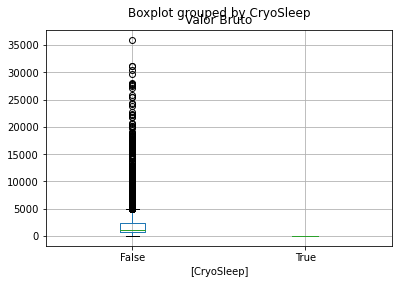

In [149]:
df_passangers.boxplot(['Valor Bruto'], by=['CryoSleep'])

<p>Pelas duas celulas abaixo dá para fazer a analise que a probabilidade de uma pessoa ter feito cryoSleep e não gastado nada e relação a nao ter feito CryoSleep e não ter gastado nada é bem maior. Dessa forma, Caso o gasto for 0 de valor Bruto e o CryoSleep for um valor nulo fáz sentido adiciona-lo como True</p>

In [150]:
(df_passangers
[(df_passangers['CryoSleep'] == True) &
(df_passangers['Valor Bruto'] == 0)
].count()
)

PassengerId     2953
HomePlanet      2882
CryoSleep       2953
Cabin           2953
Destination     2906
Age             2953
VIP             2953
RoomService     2953
FoodCourt       2953
ShoppingMall    2953
Spa             2953
VRDeck          2953
Name            2891
Transported     2953
Valor Bruto     2953
dtype: int64

In [151]:
(df_passangers
[(df_passangers['CryoSleep'] == False) &
(df_passangers['Valor Bruto'] == 0)
].count()
)

PassengerId     507
HomePlanet      494
CryoSleep       507
Cabin           507
Destination     495
Age             507
VIP             507
RoomService     507
FoodCourt       507
ShoppingMall    507
Spa             507
VRDeck          507
Name            490
Transported     507
Valor Bruto     507
dtype: int64

<p>Pela celula abaixo se ve que ninguem que gastou mais que 0 foi CryoSleep. Logo, para valores que são nulos no CryoSleep e o valor bruto for maior que 0 faz sentido adicionar o valor do CryoSleep como False </p>

In [152]:
(df_passangers
[(df_passangers['CryoSleep'] == True) &
(df_passangers['Valor Bruto'] > 0)
].count()
)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Valor Bruto     0
dtype: int64

In [153]:
#dando input nas variaveis da maneira que foi discutido nas celulas anteriores
df_passangers.loc[
    (df_passangers['CryoSleep'].isnull()) & 
    (df_passangers['Valor Bruto']>0),
     'CryoSleep']=False
df_passangers.loc[
    (df_passangers['CryoSleep'].isnull()) & 
    (df_passangers['Valor Bruto']==0),
     'CryoSleep']=True

In [154]:
#Analise de frequencia relativa do Destination pelo HomePlanet 
df_passangers.groupby(by="Destination")['HomePlanet'].value_counts(normalize=True)

Destination    HomePlanet
55 Cancri e    Europa        0.496223
               Earth         0.392795
               Mars          0.110982
PSO J318.5-22  Earth         0.913386
               Mars          0.062992
               Europa        0.023622
TRAPPIST-1e    Earth         0.538462
               Mars          0.255760
               Europa        0.205778
Name: HomePlanet, dtype: float64

In [205]:
df_passangers['HomePlanet'].value_counts()

Earth     4673
Europa    2099
Mars      1722
Name: HomePlanet, dtype: int64

<p>Como Usar valores da analise de frequencia anterior tem uma chance maior de acertar do que adicionar aleatoriamente (em certos casos indo até 91%) usamos valores do Destination para prever o home planet.
Caso não tenha valor de Destination também, colocamos como Earth que é a maior quantidade de dados</p>

In [155]:
df_passangers.loc[
    (df_passangers['HomePlanet'].isnull()) & 
    (df_passangers['Destination']==df_passangers['Destination'].value_counts().reset_index().values.tolist()[2][0]),
     'HomePlanet']='Earth'

df_passangers.loc[
    (df_passangers['HomePlanet'].isnull()) & 
    (df_passangers['Destination']=='TRAPPIST-1e'),
    'HomePlanet']='Earth'
df_passangers.loc[
    (df_passangers['HomePlanet'].isnull()) & 
    (df_passangers['Destination']=='55 Cancri e'),
    'HomePlanet']='Europa'
df_passangers.update(df_passangers["HomePlanet"].fillna('Earth'))

In [156]:
#Só falta o Destination para colocar valores, uma vez que o nome como é uma variavel  unica não vai ser utilizada no modelo
df_passangers.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination     178
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            198
Transported       0
Valor Bruto       0
dtype: int64

HomePlanet  Destination  
Earth       TRAPPIST-1e      0.696413
            PSO J318.5-22    0.155731
            55 Cancri e      0.147857
Europa      TRAPPIST-1e      0.563046
            55 Cancri e      0.428225
            PSO J318.5-22    0.008729
Mars        TRAPPIST-1e      0.857907
            55 Cancri e      0.113555
            PSO J318.5-22    0.028537
Name: Destination, dtype: float64


CryoSleep  Destination  
False      TRAPPIST-1e      0.734575
           55 Cancri e      0.191497
           PSO J318.5-22    0.073928
True       TRAPPIST-1e      0.627667
           55 Cancri e      0.244000
           PSO J318.5-22    0.128333
Name: Destination, dtype: float64

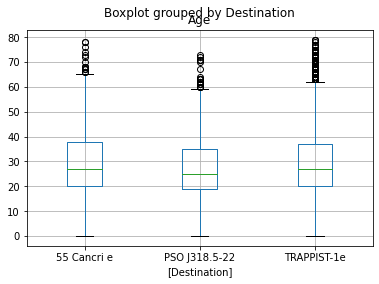

In [157]:
#tentativa falha de achar alguma correlação
df_passangers.boxplot(['Age'], by=['Destination'])
print(df_passangers.groupby(by='HomePlanet')['Destination'].value_counts(normalize=True))
df_passangers.groupby(by='CryoSleep')['Destination'].value_counts(normalize=True)
#df_passangers['Destination'].value_counts(normalize=True)

<p>Como existe muito mais pessoas que vão para o pais TRAppist vamos adicionar o valor nulo como Trappist-1e</p>

In [158]:

df_passangers.update(df_passangers["Destination"].fillna('TRAPPIST-1e'))

In [159]:
#criei novo dataframe com as variveis já ajustadas
df_passangers.isnull().sum()
df=df_passangers.copy()

# <font color='red' style='font-size: 30px;'>Manutenção Variaveis</font>
<hr style='border: 2px solid red;'>

In [160]:
#separei o valor Cabin nas 3 informações que estão nelas
df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str
#tirei a coluna Cabin, já que é um valor unico
del df["Cabin"]
#tirei a coluna name e id, pq são valores unicos para cada dado
del df['Name']
del df['PassengerId']
#fazendo a previsão no final(por tentativa e erro) é melhor utilizar separadamente os dados de gasto
#do que o de valor bruto direto para a modelagem, então tirei ele tambem
del df['Valor Bruto']

C:\Users\joaob\AppData\Local\Temp/ipykernel_13056/4094298745.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8494 non-null   object 
 1   CryoSleep       8494 non-null   object 
 2   Destination     8494 non-null   object 
 3   Age             8494 non-null   float64
 4   VIP             8494 non-null   object 
 5   RoomService     8494 non-null   float64
 6   FoodCourt       8494 non-null   float64
 7   ShoppingMall    8494 non-null   float64
 8   Spa             8494 non-null   float64
 9   VRDeck          8494 non-null   float64
 10  Transported     8494 non-null   bool   
 11  Primeira Cabin  8494 non-null   object 
 12  Segunda Cabin   8494 non-null   object 
 13  Terceira Cabin  8494 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 937.3+ KB


<p>Transformando todas as variveis para numéricas para ser possível rodar o modelo</p>

In [162]:
df["HomePlanet"]=df["HomePlanet"].astype('category')
df["HomePlanet"].cat.categories=[0,1,2]
# 0 é Earth , Europa é 1 e Mars é 2
#df["HomePlanet"].cat.categories=[0,1,2]

df["Transported"]=df["Transported"].astype('category')
#print(df['Transported'].cat.categories)
df['Transported'].cat.categories=[0,1]
#False é 0 e True é 1

df["VIP"]=df["VIP"].astype('category')
#print(df['VIP'].cat.categories)
df['VIP'].cat.categories=[0,1]
#False é 0 e True é 1

df["CryoSleep"]=df["CryoSleep"].astype('category')
#print(df['CryoSleep'].cat.categories)
df['CryoSleep'].cat.categories=[0,1]
#False é 0 e True é 1

df["Destination"]=df["Destination"].astype('category')
#print(df["Destination"].cat.categories)
df["Destination"].cat.categories=[0,1,2]
# 0 é 55 Canccri e 1 é  PSO J318.5-22, 2 é TRAPPIST-1e

df["Primeira Cabin"]=df["Primeira Cabin"].astype('category')
df["Primeira Cabin"].cat.categories=[0,1,2,3,4,5,6,7]
#0 é A, 1 é B ....6 é F e 7 é T
df["Segunda Cabin"]=df["Segunda Cabin"].astype('category')
#analisando posso deletar pq tem pouquissimos numeros para cada variavel
del df["Segunda Cabin"]
df["Terceira Cabin"]=df["Terceira Cabin"].astype("category")
df["Terceira Cabin"].cat.categories=[0,1]
#P=0 e S=1

# <font color='red' style='font-size: 30px;'>Explorando o target</font>
<hr style='border: 2px solid red;'

<AxesSubplot:title={'center':'Age'}, xlabel='[Transported]'>

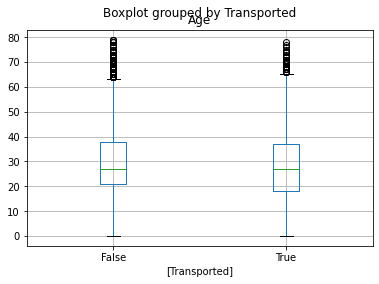

In [163]:
df_passangers.boxplot(['Age'], by=['Transported'])

<p>Por esse boxplot viu-se que não tem uma relação direta entre a idade e a chance deles serem transportados. Contudo não tiramos essa variavel porque talvez seja possivel fazer uma anlise com mais uma dimensão que não é vista por-nós mas é vista pelo modelo</p>

<p>Vamos fazer uma série de Frequencias relativas para conseguir entender melhor como cada variavel qualitativa se relaciona com a nossa Target</p>

In [164]:
df.groupby(by='HomePlanet')["Transported"].value_counts(normalize=True)

HomePlanet   
0           0    0.573935
            1    0.426065
1           1    0.659838
            0    0.340162
2           1    0.523810
            0    0.476190
Name: Transported, dtype: float64

In [165]:
df.groupby(by='Primeira Cabin')["Transported"].value_counts(normalize=True)

Primeira Cabin   
0               0    0.503906
                1    0.496094
1               1    0.734275
                0    0.265725
2               1    0.680054
                0    0.319946
3               0    0.566946
                1    0.433054
4               0    0.642694
                1    0.357306
5               0    0.560129
                1    0.439871
6               1    0.516217
                0    0.483783
7               0    0.800000
                1    0.200000
Name: Transported, dtype: float64

In [166]:
df.groupby(by='Terceira Cabin')["Transported"].value_counts(normalize=True)

Terceira Cabin   
0               0    0.548740
                1    0.451260
1               1    0.555037
                0    0.444963
Name: Transported, dtype: float64

In [167]:
df.groupby(by='CryoSleep')["Transported"].value_counts(normalize=True)

CryoSleep   
0          0    0.670707
           1    0.329293
1          1    0.815021
           0    0.184979
Name: Transported, dtype: float64

In [168]:
df.groupby(by='Destination')["Transported"].value_counts(normalize=True)

Destination   
0            1    0.609143
             0    0.390857
1            1    0.508997
             0    0.491003
2            0    0.527992
             1    0.472008
Name: Transported, dtype: float64

In [169]:
df.groupby(by='VIP')["Transported"].value_counts(normalize=True)

VIP   
0    1    0.506325
     0    0.493675
1    0    0.611399
     1    0.388601
Name: Transported, dtype: float64

<p>Outra forma de visualizar as informações anteriores. So lembrando que a ultima coluna é uma media de todas as variaveis qualitativas que se tem</p>

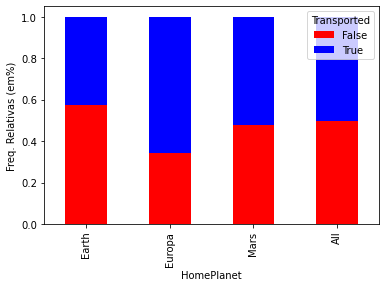

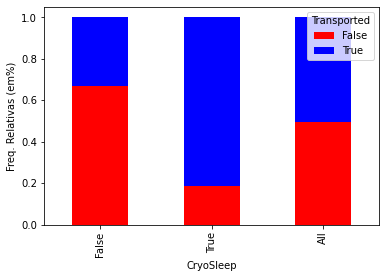

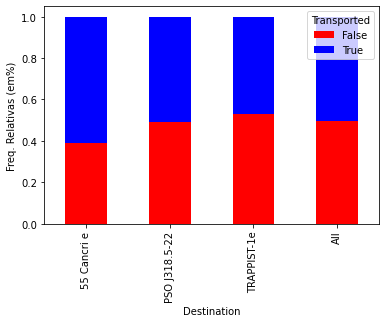

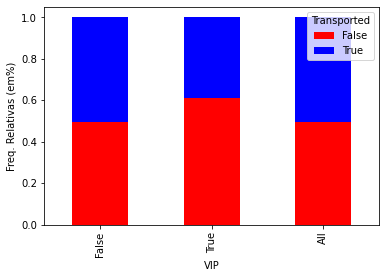

In [206]:
lista=["HomePlanet",'CryoSleep','Destination','VIP']
cores = ['red','blue','green','darkgreen','yellow','purple','pink','orange']
n=0
#seria bom fazer uma figura
for i in lista:
    Transported_x_y=pd.crosstab(df_passangers[i], df_passangers['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

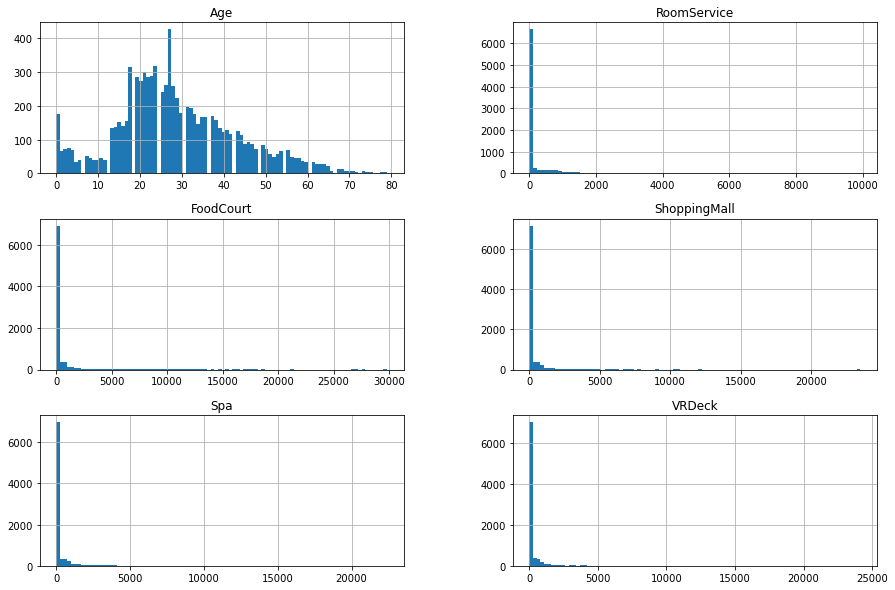

In [171]:
#parecido com o histograma do início, mas esse mostra que os valores que o gasto é 0 tambem.
#mostrando quanta gente não gastou nada
BINS= int(np.sqrt(len(df.index)))
df.hist(bins=BINS,figsize=(15,10));

# <font color='red' style='font-size: 30px;'>Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [172]:
ypassanger=df.loc[:,["Transported"]]
Xpassanger=df.drop(["Transported"],axis=1)

In [173]:
X_trainpassanger, X_testpassanger, y_trainpassanger, y_testpassanger = train_test_split(
    Xpassanger,
    ypassanger,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
X_testpassanger.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Primeira Cabin,Terceira Cabin
8415,1,0,2,17.0,0,0.0,366.0,23492.0,356.0,3.0,1,0
4676,0,1,1,29.0,0,0.0,0.0,0.0,0.0,0.0,6,1
1588,0,0,0,7.0,0,0.0,0.0,0.0,0.0,0.0,6,0
4342,1,1,2,17.0,0,0.0,0.0,0.0,0.0,0.0,1,1
5763,1,0,2,13.0,0,0.0,9.0,0.0,0.0,5648.0,2,0


In [174]:
y_testpassanger.head()

,Transported
8415,1
4676,1
1588,0
4342,1
5763,0


# <font color='red' style='font-size: 30px;'>Modelos de Classificação</font>
<hr style='border: 2px solid red;'>

In [207]:

dtc=DecisionTreeClassifier(random_state=42)
y_trainpassanger=y_trainpassanger.astype('int')
dtc.fit(X_trainpassanger, y_trainpassanger)
resultado_dtc=dtc.predict(X_testpassanger)

In [208]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression(random_state=42)
clr.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_testpassanger)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_testpassanger)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [212]:
nb = GaussianNB()
nb.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_nb = nb.predict(X_testpassanger)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [211]:
SVM = SVC(random_state=42)
SVM.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_SVM = SVM.predict(X_testpassanger)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# <font color='red' style='font-size: 30px;'>Desempenho dos modelos</font>
<hr style='border: 2px solid red;'>

In [180]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

## Resultado Decision Tree

In [181]:
print(classification_report(y_testpassanger, resultado_dtc))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1287
           1       0.75      0.76      0.75      1262

    accuracy                           0.75      2549
   macro avg       0.75      0.75      0.75      2549
weighted avg       0.75      0.75      0.75      2549



## Cross Validation

In [217]:
tree_scores = cross_val_score(
    dtc,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

tree_rmse_scores = tree_scores
print(tree_rmse_scores)

display_scores(tree_rmse_scores)

[0.66554622 0.71428571 0.71092437 0.73277311 0.72268908 0.72727273
 0.70538721 0.70707071 0.75084175 0.6986532 ]
Scores: [0.67 0.71 0.71 0.73 0.72 0.73 0.71 0.71 0.75 0.7 ]
Mean: 0.7135444076620547
Standard deviation: 0.02162027667869731


## Resultado KNN

In [183]:
print(classification_report(y_testpassanger, resultado_knn))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1287
           1       0.78      0.80      0.79      1262

    accuracy                           0.79      2549
   macro avg       0.79      0.79      0.79      2549
weighted avg       0.79      0.79      0.79      2549



## Cross Validation

In [184]:
knn_scores = cross_val_score(
    knn,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1,
)
print(knn_scores)

display_scores(knn_scores)

[0.74789916 0.77310924 0.76638655 0.75966387 0.78991597 0.76936027
 0.74915825 0.74410774 0.78451178 0.76936027]
Scores: [0.75 0.77 0.77 0.76 0.79 0.77 0.75 0.74 0.78 0.77]
Mean: 0.7653473106414282
Standard deviation: 0.014540892788810562


## Resultados Regressão Logística 
(é de classificação)

In [185]:
print(classification_report(y_testpassanger, resultado_clr))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1287
           1       0.77      0.84      0.81      1262

    accuracy                           0.80      2549
   macro avg       0.80      0.80      0.80      2549
weighted avg       0.80      0.80      0.80      2549



## Cross Validation

In [186]:
clr_scores = cross_val_score(
    clr,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
    
)


print(clr_scores)

display_scores(clr_scores)

[0.7512605  0.80168067 0.78151261 0.77815126 0.78991597 0.78114478
 0.77272727 0.75925926 0.8013468  0.76936027]
Scores: [0.75 0.8  0.78 0.78 0.79 0.78 0.77 0.76 0.8  0.77]
Mean: 0.7786359392241745
Standard deviation: 0.015603547545481572


## Resultados Gaussian Classifier

In [187]:
print(classification_report(y_testpassanger, resultado_nb))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60      1287
           1       0.63      0.93      0.75      1262

    accuracy                           0.69      2549
   macro avg       0.75      0.70      0.68      2549
weighted avg       0.75      0.69      0.68      2549



## Cross Validation

In [188]:
nb_scores = cross_val_score(
    nb,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

print(nb_scores)

display_scores(nb_scores)

[0.68067227 0.6907563  0.69411765 0.71092437 0.72773109 0.73232323
 0.67845118 0.6952862  0.68686869 0.68518519]
Scores: [0.68 0.69 0.69 0.71 0.73 0.73 0.68 0.7  0.69 0.69]
Mean: 0.6982316158786747
Standard deviation: 0.018094103630505957


## Resultados SVC 

In [189]:
print(classification_report(y_testpassanger, resultado_SVM))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1287
           1       0.74      0.89      0.81      1262

    accuracy                           0.79      2549
   macro avg       0.80      0.79      0.79      2549
weighted avg       0.80      0.79      0.79      2549



## Cross Validation

In [190]:
SVM_scores = cross_val_score(
    SVM,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

print(SVM_scores)

display_scores(SVM_scores)

[0.75798319 0.78991597 0.77647059 0.77815126 0.81176471 0.80808081
 0.77104377 0.76430976 0.8047138  0.76094276]
Scores: [0.76 0.79 0.78 0.78 0.81 0.81 0.77 0.76 0.8  0.76]
Mean: 0.7823376623376623
Standard deviation: 0.019084471331515543


<p>Aqui fiz uma analise geral de todos os modelos para ver qual tem a melhor acuracia</p>

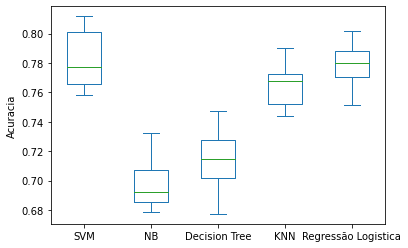

In [191]:
pd.DataFrame({
    'SVM': SVM_scores,
    'NB': nb_scores,
    'Decision Tree': tree_scores,
    'KNN': knn_scores,
     'Regressão Logistica': clr_scores,
    
}).plot.box(
    xlabel='Classificador',
    ylabel='Acuracia',
    figsize=(6, 4),
);

<p>Analisando, vimos que os melhores modelos foram a de regressão logistica e o SVM</p>


# <font color='red' style='font-size: 30px;'>Otimização de Modelos</font>
<hr style='border: 2px solid red;'>
<p>Os melhores modelos foram Regresão Logistica e SVM </p>

In [290]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

f_clas=SelectKBest(f_classif,k=3)
f_clas.fit(X_trainpassanger,y_trainpassanger)

f_clas_support=f_clas.get_support()
f_feature=X_trainpassanger.loc[:,f_clas_support].columns.tolist()
f_feature
#from sklearn.feature_selection import chi2
#chi2(X_testpassanger,y_testpassanger)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['CryoSleep', 'RoomService', 'Spa']

In [291]:
mi_clas_support=mi_clas.get_support()
mi_feature=X_testpassanger.loc[:,mi_clas_support].columns.tolist()
mi_feature

['CryoSleep',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Primeira Cabin']

In [292]:
df_f=df.loc[:,['CryoSleep','RoomService','Spa','Transported']]

In [293]:
df_f.head()

,CryoSleep,RoomService,Spa,Transported
0,0,0.0,0.0,0
1,0,109.0,549.0,1
2,0,43.0,6715.0,0
3,0,0.0,3329.0,0
4,0,303.0,565.0,1


In [294]:
ypassanger_f=df_f.loc[:,["Transported"]]
Xpassanger_f=df_f.drop(["Transported"],axis=1)

In [295]:
X_trainpassanger_f, X_testpassanger_f, y_trainpassanger_f, y_testpassanger_f = train_test_split(
    Xpassanger_f,
    ypassanger_f,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
X_testpassanger_f.head()

,CryoSleep,RoomService,Spa
8415,0,0.0,356.0
4676,1,0.0,0.0
1588,0,0.0,0.0
4342,1,0.0,0.0
5763,0,0.0,0.0


In [296]:
y_testpassanger_f.head()

,Transported
8415,1
4676,1
1588,0
4342,1
5763,0


In [297]:
# Criando modelo e treinando com os dados de treino
clr_f = LogisticRegression(random_state=42)
clr_f.fit(X_trainpassanger_f, y_trainpassanger_f)
# Fazendo a predição nos dados de treino
resultado_clr_f = clr_f.predict(X_testpassanger_f)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [298]:
SVM_f = SVC(random_state=42)
SVM_f.fit(X_trainpassanger_f, y_trainpassanger_f)
# Fazendo a predição nos dados de treino
resultado_SVM_f = SVM_f.predict(X_testpassanger_f)

C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Resultados Regressão Logística 
(é de classificação)

In [299]:
print(classification_report(y_testpassanger_f, resultado_clr_f))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1287
           1       0.82      0.60      0.70      1262

    accuracy                           0.74      2549
   macro avg       0.76      0.74      0.73      2549
weighted avg       0.76      0.74      0.73      2549



## Cross Validation

In [300]:
clr_scores_f = cross_val_score(
    clr_f,
    X_trainpassanger_f,
    y_trainpassanger_f,
    cv=10,
    n_jobs=-1
    
)


print(clr_scores_f)

display_scores(clr_scores_f)

[0.69747899 0.73109244 0.7092437  0.72605042 0.71932773 0.7037037
 0.72558923 0.71212121 0.72895623 0.6986532 ]
Scores: [0.7  0.73 0.71 0.73 0.72 0.7  0.73 0.71 0.73 0.7 ]
Mean: 0.7152216846334494
Standard deviation: 0.012039337825223444


In [301]:
print(classification_report(y_testpassanger_f, resultado_SVM_f))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1287
           1       0.66      0.87      0.75      1262

    accuracy                           0.72      2549
   macro avg       0.74      0.72      0.71      2549
weighted avg       0.74      0.72      0.71      2549



## Cross Validation

In [302]:
SVM_scores_f = cross_val_score(
    SVM_f,
    X_trainpassanger_f,
    y_trainpassanger_f,
    cv=10,
    n_jobs=-1
)

print(SVM_scores_f)

display_scores(SVM_scores_f)

[0.68739496 0.69915966 0.70252101 0.72941176 0.74789916 0.75589226
 0.71885522 0.68855219 0.75084175 0.69023569]
Scores: [0.69 0.7  0.7  0.73 0.75 0.76 0.72 0.69 0.75 0.69]
Mean: 0.7170763658998953
Standard deviation: 0.02588445231438763
